In [0]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [4]:
vocab_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)

17465344/17464789 [==============================] - 0s 0us/step


In [5]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


In [6]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369,

In [0]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [19]:
embedding_size=32
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_words))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               106400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 266,601
Trainable params: 266,601
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [22]:
batch_size = 64
num_epochs = 3
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
history=model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Train on 24936 samples, validate on 64 samples
Epoch 1/3
24936/24936 [==============================] - 652s 26ms/step - loss: 0.4911 - acc: 0.7488 - val_loss: 0.3032 - val_acc: 0.8750
Epoch 2/3
24936/24936 [==============================] - 637s 26ms/step - loss: 0.2958 - acc: 0.8809 - val_loss: 0.2291 - val_acc: 0.9219
Epoch 3/3
24936/24936 [==============================] - 633s 25ms/step - loss: 0.2520 - acc: 0.9028 - val_loss: 0.2363 - val_acc: 0.9219


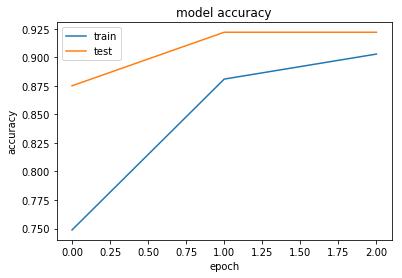

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [0]:
model.save('bidirectional_ model.h5')

In [0]:
from  google.colab import files

In [0]:
files.download('bidirectional_ model.h5')

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)

In [29]:
scores

[0.31037651510238645, 0.8682]